In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso,LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



import os



from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [2]:
train_1 = pd.read_csv("train.csv")
test_1 = pd.read_csv("test.csv")

In [3]:
train = train_1.copy()
test = test_1.copy()

In [4]:
train['Severity'] = train['Severity'].map({"Significant_Damage_And_Fatalities":0,"Minor_Damage_And_Injuries":1,"Significant_Damage_And_Serious_Injuries":2,"Highly_Fatal_And_Damaging":3})

In [5]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,0,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,2,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,0,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [6]:
y = train['Severity']
x = train.drop(['Severity'],axis=1)

/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.162299
Best score using built-in LassoCV: 0.283694
Lasso picked 5 variables and eliminated the other 6 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

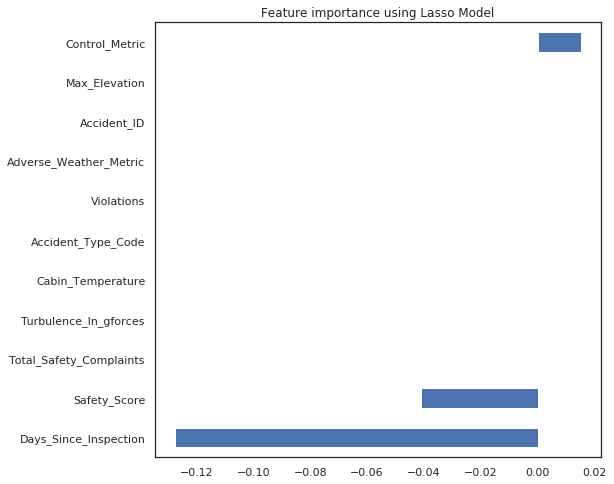

In [7]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(x,y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,8)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)


#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns


#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(10,'Score'))

                      Specs         Score
7             Max_Elevation  37871.221260
0              Safety_Score   8552.477911
10              Accident_ID   3180.018341
3            Control_Metric   1017.270613
6        Accident_Type_Code    658.840259
9    Adverse_Weather_Metric    160.457298
2   Total_Safety_Complaints     53.652473
8                Violations     27.817094
1     Days_Since_Inspection     23.452196
4     Turbulence_In_gforces      6.544339


In [9]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,0,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,2,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,0,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [10]:
train.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [11]:
train.drop(['Max_Elevation','Accident_ID','Adverse_Weather_Metric','Violations','Accident_Type_Code','Cabin_Temperature','Turbulence_In_gforces','Total_Safety_Complaints'],axis=1,inplace=True)

In [12]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Control_Metric
0,1,49.223744,14,71.285324
1,1,62.465753,10,72.288058
2,0,63.059361,13,66.362808
3,2,48.082192,11,74.703737
4,0,26.484018,13,47.948952


In [13]:
X_train = train.drop(['Severity'],axis=1)

In [14]:
Y_train = y

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_train,Y_train,random_state=0)

In [16]:
X_train = X_train.values
Y_train = Y_train.values

In [17]:
kfold = StratifiedKFold(n_splits=10)

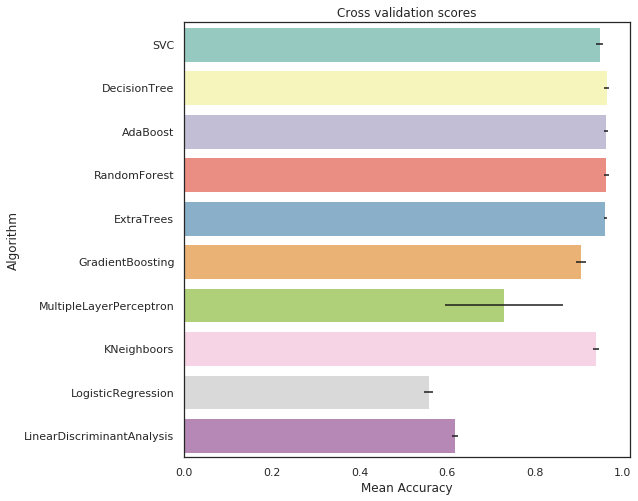

In [18]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


In [ ]:
# DTC = DecisionTreeClassifier()

# adaDTC = AdaBoostClassifier(DTC, random_state=7)

# ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
#               "base_estimator__splitter" :   ["best", "random"],
#               "algorithm" : ["SAMME","SAMME.R"],
#               "n_estimators" :[100,200,300,400,500],
#               "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5],
#                  }

# gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# gsadaDTC.fit(X_train,Y_train)

# ada_best = gsadaDTC.best_estimator_
# gsadaDTC.best_score_

Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   33.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.9min
/home/harsh/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  8.8min


In [126]:
# ExtC = ExtraTreesClassifier()


# ## Search grid for optimal parameters
# ex_param_grid = {"max_depth": [None],
#               "max_features": [1, 3],
#               "min_samples_split": [2, 3, 10],
#               "min_samples_leaf": [1, 3, 10],
#               "bootstrap": [False],
#               "n_estimators" :[100,300],
#               "criterion": ["gini"]}


# gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# gsExtC.fit(X_train,Y_train)

# ExtC_best = gsExtC.best_estimator_

# # Best score
# gsExtC.best_score_


In [175]:
# from sklearn.model_selection import RandomizedSearchCV

# from scipy.stats import randint

# est =RandomForestClassifier()
# p_distr={'max_depth':[1,3,5,10,None],
#               'n_estimators':[10,30,40,50,70,100,150,200,300,500],
#               'max_features':randint(1,3),
#                'criterion':['gini','entropy'],
#                'bootstrap':[True],
#                'min_samples_leaf':randint(1,4),
#                'verbose':randint(1,5),
#                 'oob_score':[True,False],
#                 'warm_start':[True,False]
           
#               }

# rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,n_jobs=-1, n_iter=40, cv=10,verbose=1)
   
# rdmsearch_rfc.fit(X_train,Y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   30.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [176]:
rdmsearch_rfc.best_score_


0.9686

In [ ]:
GBC = GradientBoostingClassifier()
from scipy.stats import randint
gb_param_grid = {'max_depth':[1,3,5,10,None],
              'n_estimators':[10,30,40,50,70,100,150,200,300,500],
              'max_features':[1,2,3],
               'criterion':['friedman_mse'],
               'validation_fraction':[0.1,0.2,0.3,0.4],
               'min_samples_leaf':[1,3,4],
                'learning_rate':[0.1,0.2,0.5,1,1.1],
                'warm_start':[True,False],
                'loss':['deviance'],
                
           'min_weight_fraction_leaf':[0,0.1,0.2,0.3,0.4],   
}
    
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 90000 candidates, totalling 900000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 109.0min


In [156]:
X_train = X_train.values
Y_train = Y_train.values

In [157]:
# from sklearn.model_selection import RandomizedSearchCV

# from scipy.stats import randint

# est =GradientBoostingClassifier()
# p_distr={'max_depth':[1,3,5,10,None],
#               'n_estimators':[10,30,40,50,70,100,150,200,300,500],
#               'max_features':randint(1,3),
#                'criterion':['friedman_mse'],
#                'validation_fraction':[0.1,0.2,0.3,0.4],
#                'min_samples_leaf':randint(1,4),
#                'verbose':randint(1,5),
#                 'learning_rate':[0.1,0.2,0.5,1,1.1],
#                 'warm_start':[True,False],
#                 'loss':['deviance'],
                
#            'min_weight_fraction_leaf':[0,0.1,0.2,0.3,0.4],
               
#               }

# rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,n_jobs=-1, n_iter=40, cv=10,verbose=1)
   
# rdmsearch.fit(X_train,Y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.8min finished


      Iter       Train Loss   Remaining Time 
         1        8065.9731            1.21s
         2        5594.8391            1.19s
         3        4381.7485            1.17s
         4        3580.5074            1.13s
         5        3044.9727            1.11s
         6        2607.8630            1.08s
         7        2353.1966            1.05s
         8        2128.8039            1.03s
         9        1870.8744            1.01s
        10        1701.5365            0.99s
        11        1574.8931            0.96s
        12        1451.6555            0.94s
        13        1317.9745            0.93s
        14        1252.1786            0.92s
        15        1193.3785            0.91s
        16        1124.0810            0.91s
        17        1059.7522            0.89s
        18        1007.9735            0.87s
        19         933.7636            0.85s
        20         887.9009            0.83s
        21         857.0832            0.80s
        2

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                    

In [158]:
rdmsearch.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.5,
 'loss': 'deviance',
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 70,
 'validation_fraction': 0.1,
 'verbose': 3,
 'warm_start': False}

In [159]:
ht_score = rdmsearch.best_score_
ht_score

0.9722

In [160]:
y_pred = rdmsearch.predict(x_test)

In [161]:
from sklearn import metrics 
print("Acc :",metrics.accuracy_score(y_test,y_pred))

Acc : 0.9996


In [162]:
# ### SVC classifier
# SVMC = SVC(probability=True)
# svc_param_grid = {'kernel': ['rbf'], 
#                   'gamma': [ 0.001, 0.01, 0.1, 1],
#                   'C': [1, 10, 50, 100,200,300, 1000]}

# gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

# gsSVMC.fit(x,y)

# SVMC_best = gsSVMC.best_estimator_

# # Best score
# gsSVMC.best_score_


In [163]:
# def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
#                         n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
#     """Generate a simple plot of the test and training learning curve"""
#     plt.figure()
#     plt.title(title)
#     if ylim is not None:
#         plt.ylim(*ylim)
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     plt.grid()

#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#              label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
#              label="Cross-validation score")

#     plt.legend(loc="best")
#     return plt

# g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
# g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
# g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
# g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
# g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)


In [164]:
# votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
# ('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

# votingC = votingC.fit(x,y)

In [172]:
test.drop(['Max_Elevation','Adverse_Weather_Metric','Violations','Accident_Type_Code','Cabin_Temperature','Turbulence_In_gforces','Total_Safety_Complaints','Accident_ID'],axis=1,inplace=True)

KeyError: "['Max_Elevation' 'Adverse_Weather_Metric' 'Violations'\n 'Accident_Type_Code' 'Cabin_Temperature' 'Turbulence_In_gforces'\n 'Total_Safety_Complaints' 'Accident_ID'] not found in axis"

In [166]:
test.head()

,Safety_Score,Days_Since_Inspection,Control_Metric
0,19.497717,16,72.151322
1,58.173516,15,64.585232
2,33.287671,15,64.721969
3,3.287671,21,66.362808
4,10.867580,18,56.107566


In [167]:
x=test.values

In [168]:
test.head()

,Safety_Score,Days_Since_Inspection,Control_Metric
0,19.497717,16,72.151322
1,58.173516,15,64.585232
2,33.287671,15,64.721969
3,3.287671,21,66.362808
4,10.867580,18,56.107566


In [169]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Control_Metric
0,1,49.223744,14,71.285324
1,1,62.465753,10,72.288058
2,0,63.059361,13,66.362808
3,2,48.082192,11,74.703737
4,0,26.484018,13,47.948952


In [170]:
y_pred = rdmsearch.predict(x)

In [171]:
sub = test_1['Accident_ID']

In [151]:
sub = pd.DataFrame(sub)

In [152]:
sub['Severity'] = y_pred

In [153]:
sub['Severity'] = sub['Severity'].map({0:"Significant_Damage_And_Fatalities",1:"Minor_Damage_And_Injuries",2:"Significant_Damage_And_Serious_Injuries",3:"Highly_Fatal_And_Damaging"})

In [154]:
sub.to_csv("final_duplicate.csv",index=False)

In [155]:
sub.head()

,Accident_ID,Severity
0,1,Highly_Fatal_And_Damaging
1,10,Significant_Damage_And_Fatalities
2,14,Significant_Damage_And_Serious_Injuries
3,17,Highly_Fatal_And_Damaging
4,21,Significant_Damage_And_Fatalities
